<a href="https://colab.research.google.com/github/sclaudiobr/modelo_espectral/blob/master/Modelo_espectro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><strong>Minera&ccedil;&atilde;o de dados espectrais com bibliotecas Scikit Learn e computa&ccedil;&atilde;o na nuvem&nbsp;</strong></p>
<p><span style="font-weight: 400;">Claudio R. O. da Silva&sup1;</span></p>
<p style="text-align: justify;">Este trabalho traz os passos necess&aacute;rios para elaborar o modelo de predi&ccedil;&atilde;o na linguagem de programa&ccedil;&atilde;o python atrav&eacute;s da plataforma de computa&ccedil;&atilde;o de c&oacute;digo aberto <a href="https://colab.research.google.com/notebooks/welcome.ipynb#recent=true">Collaboratory</a> e bibliotecas de aquisi&ccedil;&atilde;o, processamento e apresenta&ccedil;&atilde;o dos dados. As&nbsp;classes de solo exposto, solo &uacute;mido, grama, vegeta&ccedil;&atilde;o arbustiva, brita e asfalto foram amostradas<span style="font-weight: 400;">&nbsp;com o sensor &ldquo;FieldSpec HandHeldII". Este instrumento cobre o intervalo espectral de 300 nm a 1.3 micron em varredura cont&iacute;nua com resolu&ccedil;&atilde;o espectral de 1 nm entre 300 nm e 1300 nm. Maiores detalhes sobre os m&eacute;todos de aquisi&ccedil;&atilde;o podem ser encontradas no manual do aparelho ASD (2010).&nbsp;</span><span style="font-weight: 400;">&nbsp;Executado o fatiamento nos intervalos equivalentes aos intervalos estabelecidos na regi&atilde;o do espectro do vis&iacute;vel (VIS) e do infravermelho pr&oacute;ximo (NIR). As sec&ccedil;&otilde;es resultantes do fatiamento considerou as sec&ccedil;&otilde;es do vis&iacute;vel (0,43-0,68m) e do infravermelho pr&oacute;ximo (0,85-0,88m) discretizadas nas classes denominadas VIS e NIR.</span>&nbsp;Siga o roteiro de descrito nos t&oacute;picos de cada c&oacute;digo que deve ser executado sequancialmente para a aobten&ccedil;&atilde;o do resultados.</p>

# 1.  Bibliotecas Básicas

In [0]:
#Carregamento das bibliotecas
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sb
%matplotlib inline
from google.colab import drive

# 2.  Carregar os dados do arquivo CSV

Use a aplicação Google para buscar o arquivo baixado ou arraste o arquivo para aba "Files" do navegado no seu ambiente Colaboratory. Podendo ser tambem baixado neste [link.](https://drive.google.com/file/d/110dsbs4jx55T_CPLAvBQ33Igc43fD2zR/view?usp=sharing)

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving modelo_vis_nir.csv to modelo_vis_nir.csv
User uploaded file "modelo_vis_nir.csv" with length 5903 bytes


Leitura do Arquivo CSV no diretório raíz do seu ambiente Collaboratory.

In [0]:
spc = pd.read_csv('modelo_vis_nir.csv') # carregando aqrqui csv copiado o google drive ( esta é uma cópia temporária)

# Imprimir os dados na tela

In [6]:
print(spc[:20])

         classes       VIS       NIR
0          Grama  0.067121  0.362855
1          Grama  0.067646  0.370370
2          Grama  0.068293  0.370370
3          Grama  0.068530  0.371940
4          Grama  0.068232  0.370612
5          Grama  0.068014  0.368954
6          Grama  0.067890  0.366657
7          Grama  0.067822  0.366713
8          Grama  0.068411  0.371394
9          Grama  0.068710  0.372117
10  Solo exposto  0.052857  0.151153
11  Solo exposto  0.057210  0.165408
12  Solo exposto  0.058580  0.168656
13  Solo exposto  0.056700  0.163148
14  Solo exposto  0.052822  0.150960
15  Solo exposto  0.049359  0.140302
16  Solo exposto  0.048498  0.137115
17  Solo exposto  0.047495  0.134004
18  Solo exposto  0.045707  0.129173
19  Solo exposto  0.047895  0.135814


# Estatística dos  dados

In [7]:
spc.describe()

,VIS,NIR
count,160.000000,160.000000
mean,0.079868,0.205449
std,0.044285,0.063449
min,0.015128,0.112546
25%,0.052743,0.160680
50%,0.064622,0.217855
75%,0.101526,0.229270
max,0.168822,0.385517


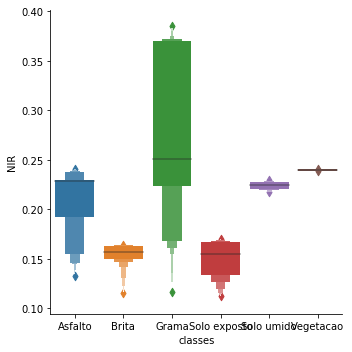

In [8]:
sb.catplot(x="classes", y="NIR", kind="boxen",
            data=spc.sort_values("classes"));

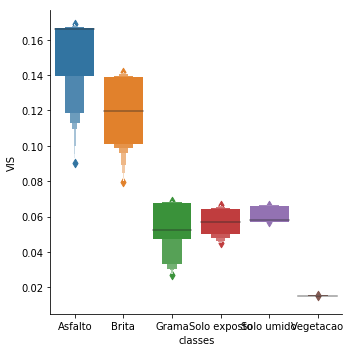

In [9]:
sb.catplot(x="classes", y="VIS", kind="boxen",
            data=spc.sort_values("classes"));

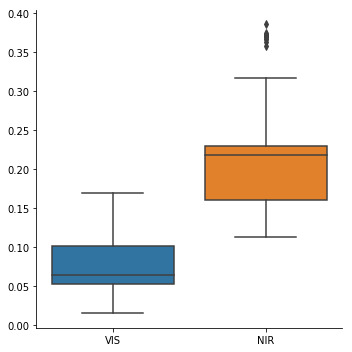

In [10]:
sb.catplot(data=spc, orient="v",kind="box")
#sb.stripplot(data=spc)
#sb.boxenplot(data=spc)


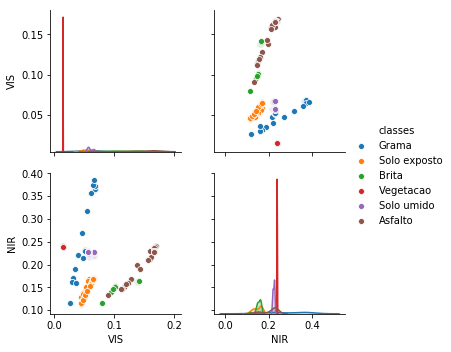

In [0]:
sb.pairplot(data=spc, hue='classes',kind = "scatter")

# Selecão dos valores para classificação supervisionada em um array no Numpy

In [14]:
x = np.array(spc.drop('classes',1))
x[1:20]

array([[0.06764623, 0.3703699 ],
       [0.06829264, 0.3703699 ],
       [0.0685303 , 0.37193987],
       [0.06823197, 0.37061186],
       [0.06801352, 0.36895388],
       [0.06788966, 0.3666568 ],
       [0.06782207, 0.36671311],
       [0.06841119, 0.37139418],
       [0.06870988, 0.37211661],
       [0.05285735, 0.15115339],
       [0.05720971, 0.16540832],
       [0.0585804 , 0.16865555],
       [0.05670028, 0.16314804],
       [0.05282191, 0.15095999],
       [0.04935865, 0.14030188],
       [0.04849751, 0.13711519],
       [0.04749549, 0.13400405],
       [0.04570688, 0.12917283],
       [0.04789454, 0.13581435]])

# Seleção das "Classes" para uma array através do Numpy

In [15]:
y = np.array(spc.classes)
y[1:40]

array(['Grama', 'Grama', 'Grama', 'Grama', 'Grama', 'Grama', 'Grama',
       'Grama', 'Grama', 'Solo exposto', 'Solo exposto', 'Solo exposto',
       'Solo exposto', 'Solo exposto', 'Solo exposto', 'Solo exposto',
       'Solo exposto', 'Solo exposto', 'Solo exposto', 'Brita', 'Brita',
       'Brita', 'Brita', 'Brita', 'Brita', 'Brita', 'Brita', 'Brita',
       'Brita', 'Grama', 'Grama', 'Grama', 'Grama', 'Grama', 'Grama',
       'Grama', 'Grama', 'Grama', 'Grama'], dtype=object)

# Bibliotecas de Modelagem


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Importando a função train_test_split 
from sklearn.model_selection import train_test_split

#Importando o módulo de metricas de cálculo acurácia do scikit-learn
from sklearn import metrics


# Dividindo o banco de dados em treinamento e teste (x,y, tamanho)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% para treino e 30% teste

knn = KNeighborsClassifier(n_neighbors=5, algorithm ='ball_tree')
dtr = DecisionTreeClassifier()
adb = AdaBoostClassifier(n_estimators=20, random_state=1)
rdf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# Treinamento  do classificador

In [22]:
knn.fit(X_train,y_train)
dtr.fit(X_train,y_train)
adb.fit(X_train,y_train)
rdf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Predição de classe através de uma informação de entrada

In [0]:
y_predknn = knn.predict(X_test)
y_preddtr = dtr.predict(X_test)
y_predadb = adb.predict(X_test)
y_predrdf = rdf.predict(X_test)

# Acurácia dos dados preditos sobre os dados  de teste (y_teste)

In [20]:
# Modelo de acurácia dos dados preditos sobre os dados  de teste (y_teste)
print(" K-nearest Neighbors :",metrics.accuracy_score(y_test, y_predknn)) # método knn
print(" Decision Trees      :",metrics.accuracy_score(y_test, y_preddtr)) # método de árvore de decisão
print(" Ada Boost           :",metrics.accuracy_score(y_test, y_predadb)) # método de adaboost
print(" Random Forest       :",metrics.accuracy_score(y_test, y_predrdf)) # método de randomForest

 K-nearest Neighbors : 0.9791666666666666
 Decision Trees      : 1.0
 Ada Boost           : 0.4791666666666667
 Random Forest       : 0.875


# Matriz de confusão

In [21]:
from sklearn.metrics import confusion_matrix
print("=="," KNN ","=",metrics.accuracy_score(y_test, y_predknn))
print(confusion_matrix(y_test, y_predknn))
print("=="," DTR ","=",metrics.accuracy_score(y_test, y_preddtr))
print(confusion_matrix(y_test, y_preddtr))
print("=="," ADB ","=",metrics.accuracy_score(y_test, y_predadb))
print(confusion_matrix(y_test, y_predadb))
print("=="," RDF ","=",metrics.accuracy_score(y_test, y_predrdf))
print(confusion_matrix(y_test, y_predrdf))     

==  KNN  = 0.9791666666666666
[[ 7  1  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  4]]
==  DTR  = 1.0
[[ 8  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  4]]
==  ADB  = 0.4791666666666667
[[ 8  0  0  0  0  0]
 [ 8  0  0  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0  0  4]]
==  RDF  = 0.875
[[ 7  1  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  5  1  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  4  0  0  0]]
